✅ Data Loaded. Shape: (421570, 21)
🔍 Running IQR Anomaly Detection on Weekly_Sales...
   ⚠️ Found 35521 anomalies (IQR Method).


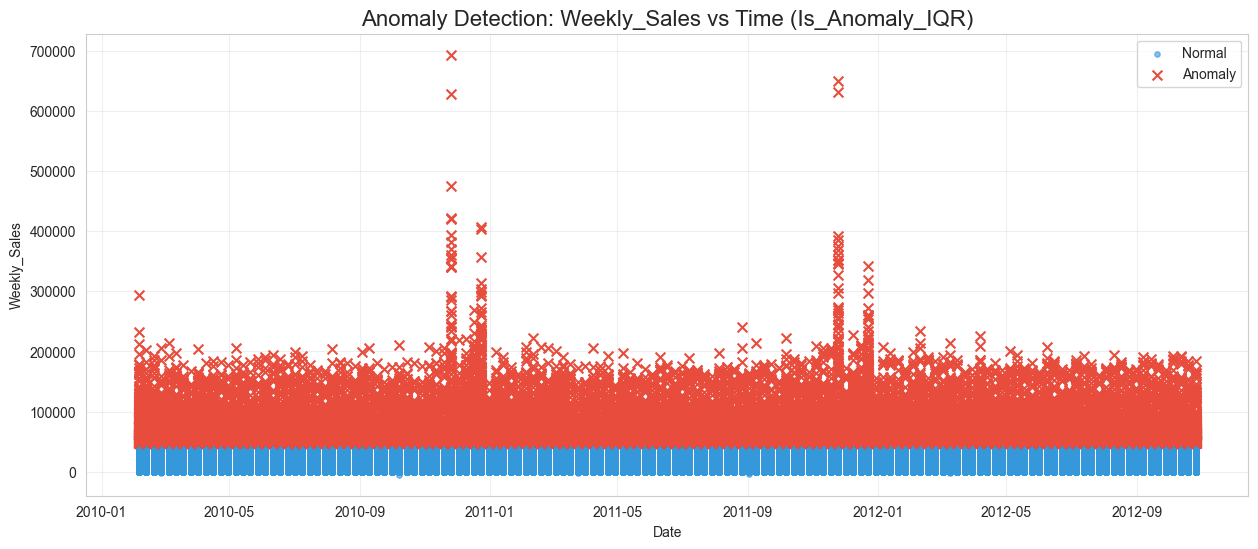

🤖 Running Isolation Forest on Weekly_Sales...
   ⚠️ Found 4044 anomalies (Isolation Forest).


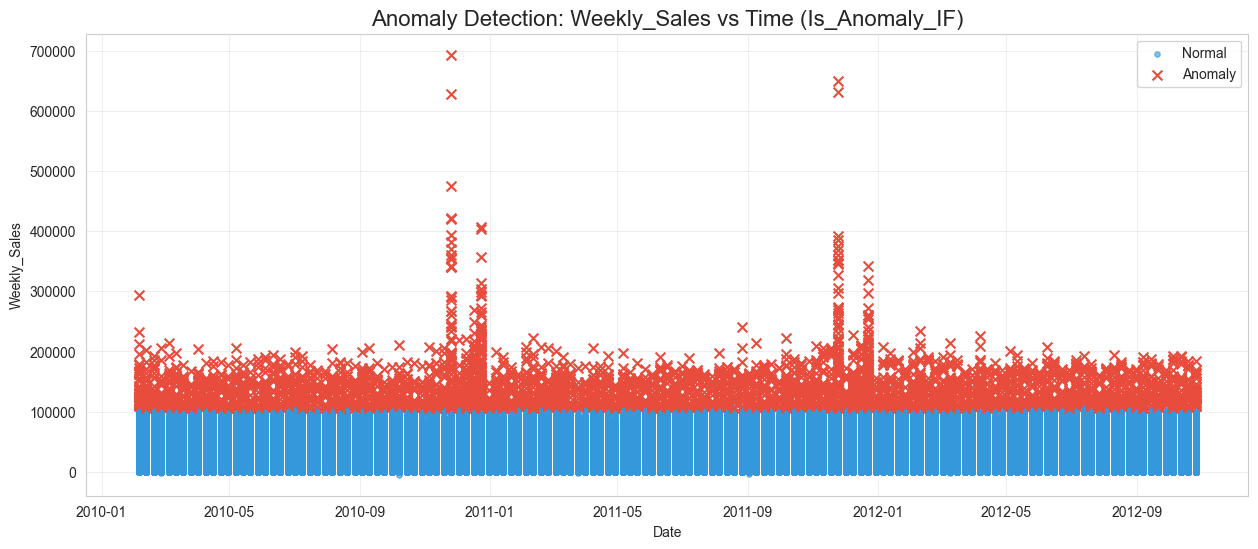

Total Anomalies Found: 4044

Percentage of Anomalies that are Holidays:
IsHoliday
0    90.380811
1     9.619189
Name: proportion, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15308\2049251566.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IsHoliday', data=anomalies, palette='viridis')


✅ Data Loaded. Shape: (421570, 21)
🔍 Running IQR Anomaly Detection on Weekly_Sales...
   ⚠️ Found 35521 anomalies (IQR Method).


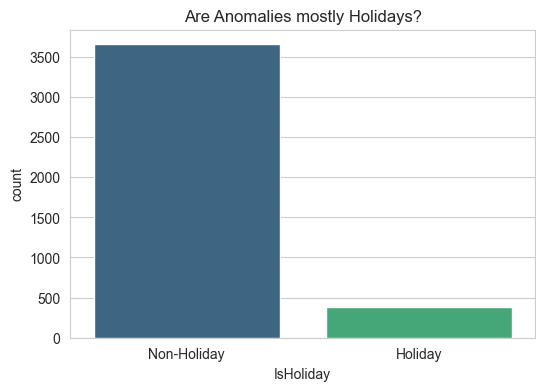

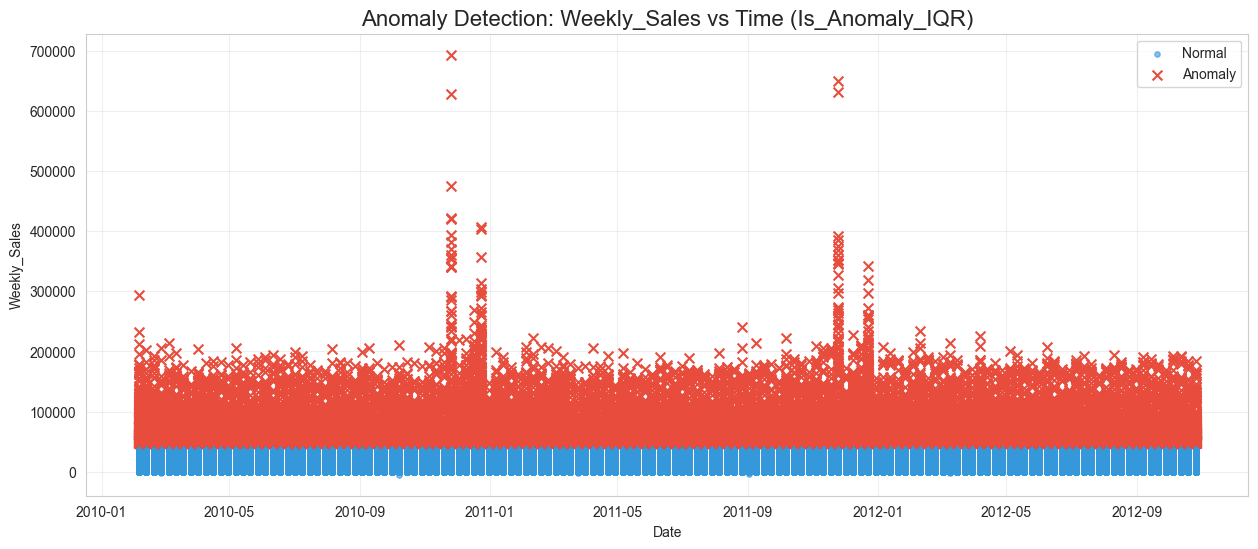

🤖 Running Isolation Forest on Weekly_Sales...
   ⚠️ Found 4044 anomalies (Isolation Forest).


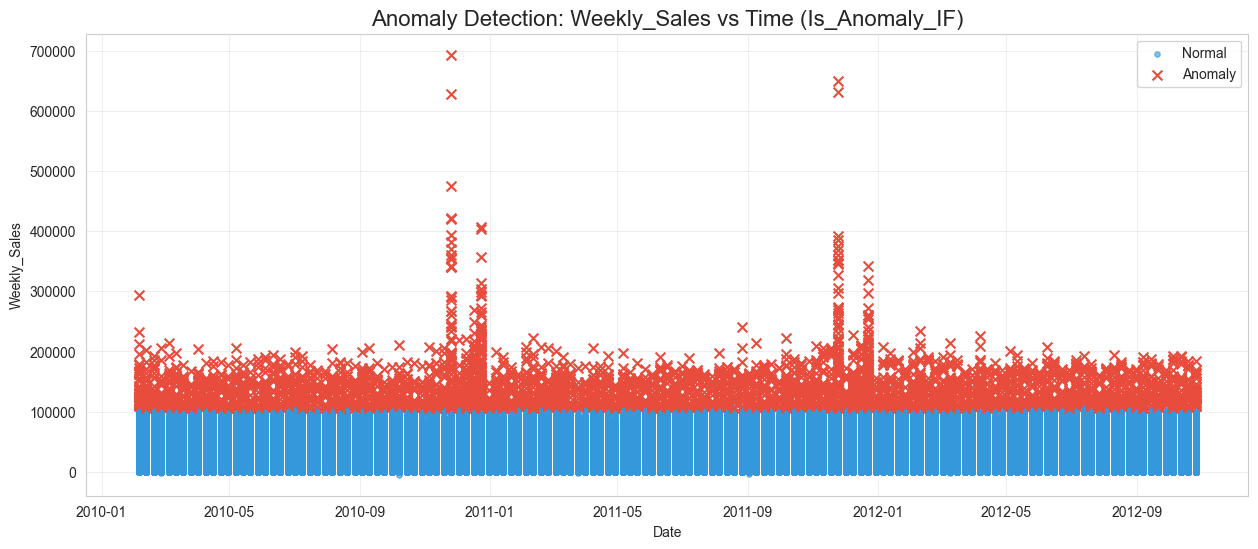

Total Anomalies Found: 4044

Percentage of Anomalies that are Holidays:
IsHoliday
0    90.380811
1     9.619189
Name: proportion, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15308\2049251566.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IsHoliday', data=anomalies, palette='viridis')


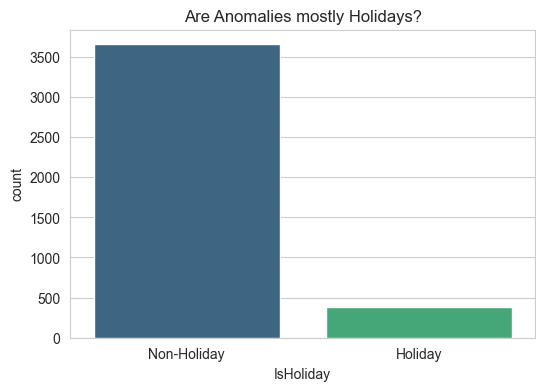

✅ Data with Anomaly flags saved to: ../data/processed/retail_data_with_anomalies.csv
✅ Data with Anomaly flags saved to: ../data/processed/retail_data_with_anomalies.csv


In [5]:
# %% [markdown]
# # 🕵️ Step 3: Anomaly Detection
# **Project:** Integrated Retail Analytics
#
# **Objective:**
# To identify unusual sales patterns (outliers) using statistical (IQR) and Machine Learning (Isolation Forest) techniques.
# We will check if these anomalies correlate with Holidays or specific events.

# %% [markdown]
# ## 1. Setup & Data Loading

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add src to path
sys.path.append(os.path.abspath('..'))
from src.anomaly_detection import AnomalyDetector

# Set visual style
sns.set_style("whitegrid")

# Load Cleaned Data
data_path = "../data/processed/clean_retail_data.csv"
if not os.path.exists(data_path):
    print("❌ Error: Clean data not found.")
else:
    df = pd.read_csv(data_path)
    # Ensure Date is datetime
    df['Date'] = pd.to_datetime(df['Date'])
    print(f"✅ Data Loaded. Shape: {df.shape}")

# %% [markdown]
# ## 2. Statistical Detection (IQR Method)
# IQR is great for finding extreme high/low values without assuming a normal distribution.

# %%
detector = AnomalyDetector(df)

# Run IQR
df = detector.detect_outliers_iqr(column='Weekly_Sales')

# Visualize IQR Anomalies
detector.plot_anomalies(anomaly_col='Is_Anomaly_IQR')

# %% [markdown]
# ## 3. Machine Learning Detection (Isolation Forest)
# Isolation Forest works better for multi-dimensional or complex datasets. It isolates observations by randomly selecting a feature and then randomly selecting a split value.

# %%
# Run Isolation Forest (Contamination 1% = assuming 1% of data is anomalous)
df = detector.detect_isolation_forest(column='Weekly_Sales', contamination=0.01)

# Visualize IF Anomalies
detector.plot_anomalies(anomaly_col='Is_Anomaly_IF')

# %% [markdown]
# ## 4. Analyzing The Anomalies
# Are these "Anomalies" actually Holidays?

# %%
# Filter rows flagged as anomalies by Isolation Forest
anomalies = df[df['Is_Anomaly_IF'] == 1]

print("Total Anomalies Found:", len(anomalies))
print("\nPercentage of Anomalies that are Holidays:")
print(anomalies['IsHoliday'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(x='IsHoliday', data=anomalies, palette='viridis')
plt.title('Are Anomalies mostly Holidays?')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])# %% [markdown]
# # 🕵️ Step 3: Anomaly Detection
# **Project:** Integrated Retail Analytics
#
# **Objective:**
# To identify unusual sales patterns (outliers) using statistical (IQR) and Machine Learning (Isolation Forest) techniques.
# We will check if these anomalies correlate with Holidays or specific events.

# %% [markdown]
# ## 1. Setup & Data Loading

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add src to path
sys.path.append(os.path.abspath('..'))
from src.anomaly_detection import AnomalyDetector

# Set visual style
sns.set_style("whitegrid")

# Load Cleaned Data
data_path = "../data/processed/clean_retail_data.csv"
if not os.path.exists(data_path):
    print("❌ Error: Clean data not found.")
else:
    df = pd.read_csv(data_path)
    # Ensure Date is datetime
    df['Date'] = pd.to_datetime(df['Date'])
    print(f"✅ Data Loaded. Shape: {df.shape}")

# %% [markdown]
# ## 2. Statistical Detection (IQR Method)
# IQR is great for finding extreme high/low values without assuming a normal distribution.

# %%
detector = AnomalyDetector(df)

# Run IQR
df = detector.detect_outliers_iqr(column='Weekly_Sales')

# Visualize IQR Anomalies
detector.plot_anomalies(anomaly_col='Is_Anomaly_IQR')

# %% [markdown]
# ## 3. Machine Learning Detection (Isolation Forest)
# Isolation Forest works better for multi-dimensional or complex datasets. It isolates observations by randomly selecting a feature and then randomly selecting a split value.

# %%
# Run Isolation Forest (Contamination 1% = assuming 1% of data is anomalous)
df = detector.detect_isolation_forest(column='Weekly_Sales', contamination=0.01)

# Visualize IF Anomalies
detector.plot_anomalies(anomaly_col='Is_Anomaly_IF')

# %% [markdown]
# ## 4. Analyzing The Anomalies
# Are these "Anomalies" actually Holidays?

# %%
# Filter rows flagged as anomalies by Isolation Forest
anomalies = df[df['Is_Anomaly_IF'] == 1]

print("Total Anomalies Found:", len(anomalies))
print("\nPercentage of Anomalies that are Holidays:")
print(anomalies['IsHoliday'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(x='IsHoliday', data=anomalies, palette='viridis')
plt.title('Are Anomalies mostly Holidays?')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

# %% [markdown]
# **Observation:**
# If a large chunk of your anomalies are Holidays (IsHoliday=1), then they are likely **"Events"** rather than **"Errors"**.
# * **Action:** We should keep them for the Forecasting model (maybe adding a "Holiday_Flag"), but we might want to treat them separately for general trend analysis.

# %% [markdown]
# ## 5. Save Data with Anomaly Flags
# We save this dataset because we might want to filter out anomalies for specific future tasks (like calculating baseline sales).

# %%
output_path = "../data/processed/retail_data_with_anomalies.csv"
df.to_csv(output_path, index=False)
print(f"✅ Data with Anomaly flags saved to: {output_path}")
plt.show()

# %% [markdown]
# **Observation:**
# If a large chunk of your anomalies are Holidays (IsHoliday=1), then they are likely **"Events"** rather than **"Errors"**.
# * **Action:** We should keep them for the Forecasting model (maybe adding a "Holiday_Flag"), but we might want to treat them separately for general trend analysis.

# %% [markdown]
# ## 5. Save Data with Anomaly Flags
# We save this dataset because we might want to filter out anomalies for specific future tasks (like calculating baseline sales).

# %%
output_path = "../data/processed/retail_data_with_anomalies.csv"
df.to_csv(output_path, index=False)
print(f"✅ Data with Anomaly flags saved to: {output_path}")